# Multiple Linear Regression for Startups 

## Importing the libraries

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

To make things simple, we usually structure the dataset so that the target variable column is the last column in the table

*  **X typically denotes the feature variables**, which are all the columns in the table except the last one
* **y typically denotes the single target variable**, which is the last column in the table

In [24]:
df = pd.read_csv('Startups.csv')
df.index = df.index + 1 # Start index from 1 instead of 0, just to make it easier to interpret data
X = df.iloc[  :  , :-1] # Accesses all columns except the last
y = df.iloc[  :  , -1]  # Accesses the last column

In [25]:
print ("Feature variables of the entire dataset")
print(X)
print (type(X))

Feature variables of the entire dataset
          RnD      Admin  Marketing       State
1   165349.20  136897.80  471784.10    New York
2   162597.70  151377.59  443898.53  California
3   153441.51  101145.55  407934.54     Florida
4   144372.41  118671.85  383199.62    New York
5   142107.34   91391.77  366168.42     Florida
6   131876.90   99814.71  362861.36    New York
7   134615.46  147198.87  127716.82  California
8   130298.13  145530.06  323876.68     Florida
9   120542.52  148718.95  311613.29    New York
10  123334.88  108679.17  304981.62  California
11  101913.08  110594.11  229160.95     Florida
12  100671.96   91790.61  249744.55  California
13   93863.75  127320.38  249839.44     Florida
14   91992.39  135495.07  252664.93  California
15  119943.24  156547.42  256512.92     Florida
16  114523.61  122616.84  261776.23    New York
17   78013.11  121597.55  264346.06  California
18   94657.16  145077.58  282574.31    New York
19   91749.16  114175.79  294919.57     Florida


In [26]:
print ("Target variable of the entire dataset")
print (y)
print (type(y))

Target variable of the entire dataset
1     192261.83
2     191792.06
3     191050.39
4     182901.99
5     166187.94
6     156991.12
7     156122.51
8     155752.60
9     152211.77
10    149759.96
11    146121.95
12    144259.40
13    141585.52
14    134307.35
15    132602.65
16    129917.04
17    126992.93
18    125370.37
19    124266.90
20    122776.86
21    118474.03
22    111313.02
23    110352.25
24    108733.99
25    108552.04
26    107404.34
27    105733.54
28    105008.31
29    103282.38
30    101004.64
31     99937.59
32     97483.56
33     97427.84
34     96778.92
35     96712.80
36     96479.51
37     90708.19
38     89949.14
39     81229.06
40     81005.76
41     78239.91
42     77798.83
43     71498.49
44     69758.98
45     65200.33
46     64926.08
47     49490.75
48     42559.73
49     35673.41
50     14681.40
Name: Profit, dtype: float64
<class 'pandas.core.series.Series'>


## Perform dummy encoding on categorical variables in dataset

Here, there is only one categorical variable column, State.


In [27]:
# Perform dummy encoding on the 'Country' column in X
X = pd.get_dummies(X, columns=['State'], drop_first=True).astype(int)

print ("Feature variables after dummy encoding on the State column")
print(X)

Feature variables after dummy encoding on the State column
       RnD   Admin  Marketing  State_Florida  State_New York
1   165349  136897     471784              0               1
2   162597  151377     443898              0               0
3   153441  101145     407934              1               0
4   144372  118671     383199              0               1
5   142107   91391     366168              1               0
6   131876   99814     362861              0               1
7   134615  147198     127716              0               0
8   130298  145530     323876              1               0
9   120542  148718     311613              0               1
10  123334  108679     304981              0               0
11  101913  110594     229160              1               0
12  100671   91790     249744              0               0
13   93863  127320     249839              1               0
14   91992  135495     252664              0               0
15  119943  156547     256

## Splitting original dataset into the Training set and Test set


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
print (f"There are {len(X_train)} rows in the training dataset\n")
print ("The feature variable values are")

There are 40 rows in the training dataset

The feature variable values are


In [30]:
X_train

,RnD,Admin,Marketing,State_Florida,State_New York
34,55493,103057,214634,1,0
36,46014,85047,205517,0,1
27,75328,144135,134050,1,0
35,46426,157693,210797,0,0
19,91749,114175,294919,1,0
8,130298,145530,323876,1,0
15,119943,156547,256512,1,0
46,1000,124153,1903,0,1
49,542,51743,165265,0,1
30,65605,153032,107138,0,1


In [31]:
y_train

34     96778.92
36     96479.51
27    105733.54
35     96712.80
19    124266.90
8     155752.60
15    132602.65
46     64926.08
49     35673.41
30    101004.64
16    129917.04
31     99937.59
33     97427.84
17    126992.93
43     71498.49
21    118474.03
44     69758.98
9     152211.77
14    134307.35
26    107404.34
6     156991.12
18    125370.37
41     78239.91
50     14681.40
2     191792.06
13    141585.52
38     89949.14
25    108552.04
7     156122.51
24    108733.99
37     90708.19
22    111313.02
20    122776.86
10    149759.96
40     81005.76
47     49490.75
4     182901.99
1     192261.83
48     42559.73
45     65200.33
Name: Profit, dtype: float64

In [32]:
print (f"There are {len(X_test)} rows in the test dataset\n")
print ("The feature variable values are")

There are 10 rows in the test dataset

The feature variable values are


In [33]:
X_test

,RnD,Admin,Marketing,State_Florida,State_New York
29,66051,182645,118148,1,0
12,100671,91790,249744,0,0
11,101913,110594,229160,1,0
42,27892,84710,164470,1,0
3,153441,101145,407934,1,0
28,72107,127864,353183,0,1
39,20229,65947,185265,0,1
32,61136,152701,88218,0,1
23,73994,122782,303319,1,0
5,142107,91391,366168,1,0


In [34]:
y_test

29    103282.38
12    144259.40
11    146121.95
42     77798.83
3     191050.39
28    105008.31
39     81229.06
32     97483.56
23    110352.25
5     166187.94
Name: Profit, dtype: float64

## Training the Multiple Linear Regression model using the training dataset

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Generating predictions using the test dataset

We generate predictions from the test dataset and then compare these visually with the actual test target variable values by printing them out or using a simple scatter plot

For a real life ML project, this step is not necessary. We would only need to check the regression metrics to 
determine evaluate how good or accurate this model is. We **do not use manual inspection** to determine how good a model is !


In [36]:
# Generate predictions from the model using the test data set
y_pred = regressor.predict(X_test)
print ("The predictions generated from the model using the test dataset feature variable values")

# Round up the predictions to 1 decimal place for easier viewing
y_pred_rounded = np.ceil(y_pred * 10) / 10

print (y_pred_rounded.tolist())

# We compare these predictions with the actual test target variable values
print ("\nThe actual target variable values corresponding to the test dataset feature variable values")
print (y_test.tolist())




The predictions generated from the model using the test dataset feature variable values
[101624.4, 126930.8, 128395.1, 70902.8, 176773.1, 121351.1, 67273.2, 94762.0, 116616.4, 164883.6]

The actual target variable values corresponding to the test dataset feature variable values
[103282.38, 144259.4, 146121.95, 77798.83, 191050.39, 105008.31, 81229.06, 97483.56, 110352.25, 166187.94]


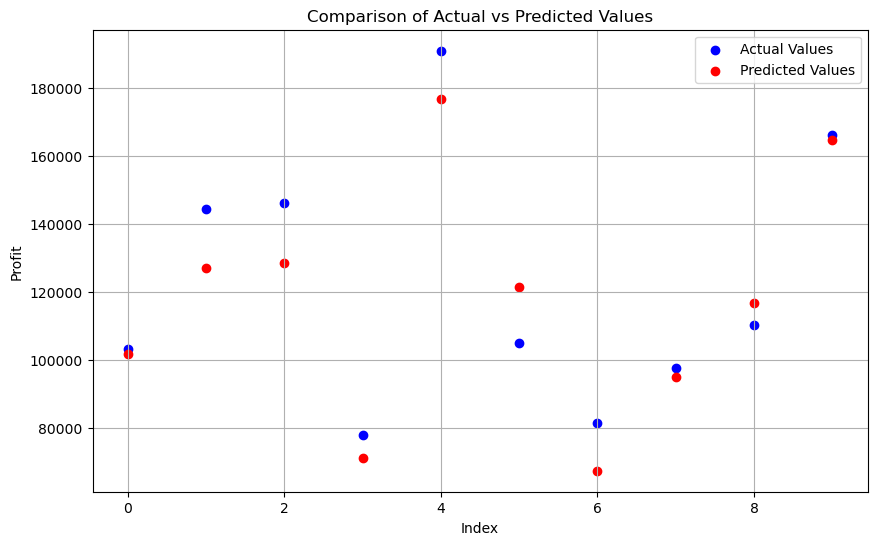

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values')
plt.title('Comparison of Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)
plt.show()

## Common metrics for model evaluation in regression
* R Squared 
* Mean Square Error(MSE) / Root Mean Square Error(RMSE)
* Mean Absolute Error(MAE)

When we evaluate metrics, we use the target variable (Profit Column) in test dataset as the ground truth
and compare that with the predictions generated by the model for the feature variables in the test dataset

R Squared is always between 0 (totally useless) and 1 (perfect accuracy)

RMSE and MAE both are roughly in the same units or magnitude range as the target variable (Profit column)
RMSE / MAE are in thousands (1000s) while Profit is in (100,000s)

Therefore, RMSE / MAE will have different range of values, depending on the magnitude of the target variable column
In other words, they are dataset specific

They are good for **comparing between different models trained on the same dataset**

Typically used in  data science competitions such as Kaggle !



R Squared, on the other hand, is always between 0 and 1, regardless of the magnitude of the target variable column

It is good for **assessing the accuracy of the model as a whole, and is therefore a more popular metric**

It is also easier to explain and justify to non data-scientists ! 

 


In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

print("R2 score : ", r2_score(y_test,y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE : " ,np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE : " , mean_absolute_error(y_test,y_pred))

R2 score :  0.8921823125735281
MSE:  137887134.02674896
RMSE :  11742.53524698772
MAE :  9847.576882390324


## Using the model to generate predictions

Assuming we are happy with the metrics for the model, we are now ready to use the model by providing it some values for the feature variables and generating a prediction for the target variable

For e.g. assume we want to predict profit for a company in New York with the following situation


RnD: 165000


Admin: 135000


Marketing: 475000


To encode New York, we use State_Florida = 0 and State_New York = 1


In [39]:

# We must create a DataFrame with the same structure and labels as the training dataset that was used
# to train the model initially. Then put our specific feature variable values into it

sample_df = pd.DataFrame({
    'RnD': [165000],
    'Admin': [135000],
    'Marketing': [475000],
    'State_Florida' : [0],
    'State_New York' : [1]
})
sample_df

,RnD,Admin,Marketing,State_Florida,State_New York
0,165000,135000,475000,0,1


In [40]:
profit_pred = regressor.predict(sample_df)
print ("The predicted target variable value (profit) for that sample data point is ", profit_pred)

The predicted target variable value (profit) for that sample data point is  [194529.66248322]
